In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nltk 
import string
import re
import codecs
import json
#%matplotlib inline
#pd.set_option('display.max_colwidth', 100)

import hdbscan
import nltk
import numpy as np
import pandas as pd
import random
import re
import spacy
# import textacy
import csv
import sklearn

# from gmplot import gmplot
from mapsplotlib import mapsplot as mplt
from nltk.corpus import twitter_samples
from nltk.tag import pos_tag_sents
# from pymprog import *
from sklearn.cluster import DBSCAN
from sklearn.neighbors import DistanceMetric
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

import pandas as pd

import datetime
from time import strptime

from nltk.stem.snowball import SnowballStemmer
from nltk.corpus import stopwords
from bs4 import BeautifulSoup
import re
from sklearn.cluster import KMeans
import clustering_models as cl
import timestamp_graphs as tg
import warnings
warnings.filterwarnings('ignore')
# from geograpy import places
# from urllib.request import urlopen
%load_ext autotime

In [2]:
colnames=['tweets', 'created_at', 'id', 'rt', 'lang', 'urls', 'Event']
df_relevant = pd.read_csv('clean_relevant_tweets.csv', header='infer')
print(df_relevant.shape[0])
df_relevant.head(1)

97754


,tweets,created_at,id,rt,lang,urls,Event
0,News: Chinese author Mo Yan wins Nobel http://...,Thu Oct 11 11:08:32 +0000 2012,256350567369175040,False,en,http://bbc.in/RbTlMC,0


time: 289 ms


In [3]:
colnames=['tweets', 'created_at', 'id', 'rt', 'lang', 'urls'] 
df_irrelevant = pd.read_csv('output_irrelevant_nocord.csv', names=colnames, header=None)
# df_irrelevant = pd.read_csv('output_2_5_million.csv', names=colnames, header=None)
# df_irrelevant['urls'] = 'None'
df_irrelevant['Event'] = -1
print(df_irrelevant.shape[0])
df_irrelevant.head(1)

413986


,tweets,created_at,id,rt,lang,urls,Event
0,I love ms.sivney class (Sports &amp; Entertaim...,Wed Oct 31 16:48:39 +0000 2012,263683917889040385,False,en,None,-1


time: 1.12 s


In [4]:
frames = [df_relevant,df_irrelevant]
df = pd.concat(frames)

time: 100 ms


In [5]:
print("Old df shape:",df.shape[0])
df = df.loc[df["lang"]=='en']
print("New df shape:",df.shape[0])

Old df shape: 511740
New df shape: 501657
time: 182 ms


In [6]:
import timestamp_graphs as tg
df = df.reset_index(drop=True)
df = tg.createTimestamps(df)
# list_date_ten = tg.getList(df,'Date_Ten_Minutes')
# len(list_date_ten)

time: 9.72 s


In [7]:
df_relevant = tg.createTimestamps(df_relevant)
df_irrelevant = tg.createTimestamps(df_irrelevant)
# tg.monitorGraphPerTenMinutes(df_relevant,df_irrelevant)

time: 10.2 s


In [8]:
list_date_minutes = tg.getList(df,'Datetime')
print(len(list_date_minutes))

39949
time: 2.7 s


In [35]:
list_date_hours = tg.getList(df,'DateHour')
print(len(list_date_hours))

672
time: 2.72 s


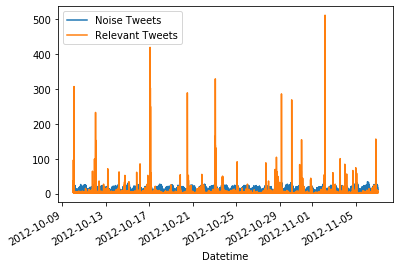

time: 833 ms


In [9]:
tg.monitorGraphPerMinute(df_relevant,df_irrelevant)

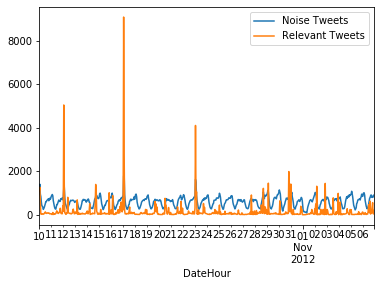

time: 744 ms


In [34]:
tg.monitorGraphPerHour(df_relevant,df_irrelevant)

In [11]:
import data_preprocessing_methods as dpm
import clustering_processing as cp

time: 8.98 ms


In [12]:
import nltk
# nltk.download()
stopword = nltk.corpus.stopwords.words('english')
# Stemming is the process of breaking a word down into its root.
stemmer = SnowballStemmer('english')
stops = set(stopwords.words("english"))

time: 11 ms


In [13]:
temp = df.loc[df.Event==0]
temp.shape[0]

321

time: 5.99 ms


In [14]:
def getPlaces(list_url):
    list_places = []
    for temp_url in list_url:
        try:
            ret = urlopen(temp_url)
            e = extraction.Extractor(url=ret.url)
            e.find_entities()
            name_places = e.places
            counter = collections.Counter(name_places)
            crucial_words = counter.most_common(3)
            for i in range(len(crucial_words)):
                list_places.append(crucial_words[i][0])
            print(list_places)
        except:
            pass
    return list_places

time: 4.99 ms


In [15]:
def process_data(df):
    try:
        temp = np.vectorize(dpm.remove_patterns)(df['tweets'],"@[\w]*","#[\w]*","RT")
        df["text"] = np.array([text["input_text"] for text in temp])
        df["hashtag"] = [dpm.list_lower(text["hashtags"]) for text in temp]
        df["user_mentions"] = [text["user_mentions"] for text in temp] 
        df["RT"] = [text["is_RT"] for text in temp]
        df["URL"] = [text["is_URL"] for text in temp]

        df['Tweet_punct'] = df['text'].apply(lambda x: dpm.remove_punct(x))
        df['Tweet_tokenized'] = df['Tweet_punct'].apply(lambda x: dpm.tokenization(x.lower()))

        df['Tweet_nonstop'] = df['Tweet_tokenized'].apply(lambda x: dpm.remove_stopwords(x,stopword))
        df["Stem_sent"] = [dpm.stemming_to_sent(temp,stemmer) for temp in df["Tweet_nonstop"]]
        df["Stem_words"] = [dpm.stemming_to_words(temp,stemmer) for temp in df["Tweet_nonstop"]]
    #     print(df['URL'])
        list_index = df.index.tolist()
        df["clean_data"] = [dpm.new_clean_data(i,df) for i in list_index]
#         df = df.sort_values(by=['Datetime'])
    except Exception as e:
        print(e)
        import pdb; pdb.set_trace()
        return pd.DataFrame()
    return df

time: 9.97 ms


In [16]:
temp_df = process_data(temp)

time: 181 ms


In [17]:
temp_df.iloc[14].tweets

'BREAKING: The 2012 Nobel Prize for Literature is awarded to Chinese author Mo Yan'

time: 2.99 ms


In [18]:
temp_df.iloc[0].clean_data

'news chines author mo yan win nobel #news #bbc http://bbc.in/RbTlMC '

time: 5.98 ms


In [19]:
temp_df.iloc[0]['tweets']

'News: Chinese author Mo Yan wins Nobel http://t.co/9QFHaJyE #News #BBC'

time: 6.98 ms


In [20]:
temp_df.iloc[0]['hashtag']

['#news', '#bbc']

time: 5.98 ms


In [21]:
def getTimeSeriesDataframe(df,list_date_minutes,k,temporal_clusters):
    df1 = df.loc[df['Datetime']==list_date_minutes[k]]
    df2 = df.loc[df['Datetime']==list_date_minutes[k+1]]
    df3 = df.loc[df['Datetime']==list_date_minutes[k+2]]
    df4 = df.loc[df['Datetime']==list_date_minutes[k+3]]
    df5 = df.loc[df['Datetime']==list_date_minutes[k+4]]
    df6 = df.loc[df['Datetime']==list_date_minutes[k+5]]
    df7 = df.loc[df['Datetime']==list_date_minutes[k+6]]
    df8 = df.loc[df['Datetime']==list_date_minutes[k+7]]
    df9 = df.loc[df['Datetime']==list_date_minutes[k+8]]
    df10 = df.loc[df['Datetime']==list_date_minutes[k+9]]
    list_1 = [df1,df2,df3,df4,df5,df6,df7,df8,df9,df10]
    dfchange_1 = pd.concat(list_1)
    dfchange_1 = process_data(dfchange_1)
    if dfchange_1.empty:
        list_of_dataframes = [temporal_clusters]
    else:
        list_of_dataframes = [dfchange_1,temporal_clusters]
    dfchange = pd.concat(list_of_dataframes)
    dfchange = dfchange.sort_values(by=['Datetime'])
        
    return dfchange

time: 3.99 ms


In [68]:
def create_clusters_show_time_window(df,min_ngram,max_ngram,epsilon,mindf,maxdf,ir,method_cl,list_date_minutes,filename):
    temporal_clusters = None
    saved_clusters = None
    df['Clustered'] = False
    df['Cluster'] = -1
    count_labels = 0
    timestamp = 0
    count_timestamp = 1000
    list_cluster_timer = []
    list_cluster_cycles = []
    for k in range(0,len(list_date_minutes)-10):
#     for k in range(20):
        timestamp+=1
        if timestamp == count_timestamp:
            print('Timestamp:',timestamp)
            count_timestamp+=1000
        for i in range(len(list_cluster_timer)):
            if list_cluster_cycles[i]!=-1 or list_cluster_timer[i]!=-1:
                list_cluster_timer[i]+=1
                list_cluster_cycles[i] += 1
        
       
        dfchange = getTimeSeriesDataframe(df,list_date_minutes,k,temporal_clusters)
        tweets = dfchange.sort_values(by=['time'])
        tweetsContent = tweets.copy()["clean_data"]
        
        tfidf_object = cl.getTfIdf(tweetsContent,dfchange.shape[0],min_ngram,max_ngram,mindf,maxdf)
        tfidf = tfidf_object['tfidf_train_data_features']
#         minimum = tfidf_object['minimum']
#         maximum = tfidf_object['maximum']
        list_sum = tfidf_object['sum']
        tweets['sum'] = list_sum
        noise_tweets = tweets.loc[tweets['sum']==0]

        
        train_tweets = tweets.loc[tweets['sum']!=0]
        trainContent = train_tweets.copy()["clean_data"]
        
        if (ir==True):
            headline_vectorizer = CountVectorizer(binary=True, min_df=1,ngram_range=(1,1))
        else:
            headline_vectorizer = TfidfVectorizer(min_df=1,ngram_range=(min_ngram,max_ngram))            
        tfidf = headline_vectorizer.fit_transform(trainContent)
        
        try:
            if (method_cl == 'dbscan'):
                x_object = cl.getDBSCAN(train_tweets,tfidf,epsilon)
            elif (method_cl == 'hdbscan'):
                x_object = cl.getHDBSCAN(train_tweets,tfidf)
            elif (method_cl == 'hierarchical'):
                x_object = cl.getHierarchical(train_tweets,tfidf)
            elif (method_cl == 'kmeans'):
                x_object = cl.getKMeans(train_tweets,tfidf)
            else:
                x_object = cl.getAffinity(train_tweets,tfidf)

            candidate_cluster = x_object["clusters"]
            if (method_cl=='dbscan' or method_cl=='hdbscan'):
                    candidate_noise = x_object["noise_data"]

            new_candidates = []
            for temp_cluster in candidate_cluster:
                new_candidates.append(temp_cluster)

            for temp in new_candidates:
                temp_cluster = temp.loc[temp['Clustered']==True]
                if temp_cluster.shape[0]==0:
                    df = df.drop(temp.index.tolist())
                    temp['Clustered'] = True
                    temp['Cluster'] = count_labels
                    list_cluster_timer.append(0)
                    list_cluster_cycles.append(0)

                    count_labels+=1
                    temporal_clusters = pd.concat([temporal_clusters,temp])
                else:
                    label = cp.getClusterLabel(temp_cluster)
                    label_cluster = temporal_clusters.loc[temporal_clusters['Cluster']==label]
                    if temp.shape[0] != label_cluster.shape[0]:
                        new_items = temp.loc[temp['Cluster']!=label]
                        df = df.drop(new_items.index.tolist())
                        temporal_clusters = temporal_clusters.drop(new_items.index.tolist())
                        new_items['Clustered'] = True
                        new_items['Cluster'] = label
                        temporal_clusters = pd.concat([temporal_clusters,new_items])
                        try:
                            list_cluster_timer[label] = 0
                        except:
                            pass

            for i in range(len(list_cluster_timer)):
                if(list_cluster_timer[i]==3 or list_cluster_cycles[i]==5 or k==len(list_date_minutes)-10):
                    temp = temporal_clusters.loc[temporal_clusters['Cluster']==i]
                    if temp.shape[0]!=0:
                        temp['Timestamp'] = timestamp
                        temp_df = temp[['tweets','Timestamp','Cluster','Event']]
                        saved_clusters = pd.concat([saved_clusters,temp_df])
#                         print('Timestamp:',list_date_minutes[k],'-',list_date_minutes[k+9])
#                         print('Size: ',temp.shape[0])
#                         for index,row in temp.iterrows():
#                             print(row['Event'],row['clean_data'])
    #                         print(row['Event'],' ',end='')
#                         print()
#                         print()
                    temporal_clusters = temporal_clusters.drop(temp.index.tolist())
                    list_cluster_timer[i]=-1
                    list_cluster_cycles[i] = -1
        except:
            pass
    print("Size:",saved_clusters.shape[0])
#     return saved_clusters    
    saved_clusters.to_csv(filename,index=False)


time: 12 ms


In [53]:
list_epsilon = [0.4,0.5,0.6,0.7,0.8,0.9]
list_title_1 = []
list_title_2 = []
list_title_3 = []
list_title_4 = []
list_title_5 = []
for i in range(6):
    list_title_1.append("temp13_"+str(list_epsilon[i]).split(".")[1]+".csv")
    list_title_2.append("temp23_"+str(list_epsilon[i]).split(".")[1]+".csv")
    list_title_3.append("temp12_"+str(list_epsilon[i]).split(".")[1]+".csv")
    list_title_4.append("temp22_"+str(list_epsilon[i]).split(".")[1]+".csv")
    list_title_5.append("temp11_"+str(list_epsilon[i]).split(".")[1]+".csv")

time: 2.99 ms


In [69]:
for i in range((len(list_epsilon))):
    title = list_title_1[i]
    eps = list_epsilon[i]
    create_clusters_show_time_window(df,1,3,eps,0,0,False,'dbscan',list_date_minutes,title)
    print("Done:",i)

Timestamp: 1000
Timestamp: 2000
Timestamp: 3000
Timestamp: 4000
Timestamp: 5000
Timestamp: 6000
Timestamp: 7000
Timestamp: 8000
Timestamp: 9000
Timestamp: 10000
Timestamp: 11000
Timestamp: 12000
Timestamp: 13000
Timestamp: 14000
Timestamp: 15000
Timestamp: 16000
Timestamp: 17000
Timestamp: 18000
Timestamp: 19000
Timestamp: 20000
Timestamp: 21000
Timestamp: 22000
Timestamp: 23000
Timestamp: 24000
Timestamp: 25000
Timestamp: 26000
Timestamp: 27000
Timestamp: 28000
Timestamp: 29000
Timestamp: 30000
Timestamp: 31000
Timestamp: 32000
Timestamp: 33000
Timestamp: 34000
Timestamp: 35000
Timestamp: 36000
Timestamp: 37000
Timestamp: 38000
Timestamp: 39000
Size: 7656
Done: 0
Timestamp: 1000
Timestamp: 2000
Timestamp: 3000
Timestamp: 4000
Timestamp: 5000
Timestamp: 6000
Timestamp: 7000
Timestamp: 8000
Timestamp: 9000
Timestamp: 10000
Timestamp: 11000
Timestamp: 12000
Timestamp: 13000
Timestamp: 14000
Timestamp: 15000
Timestamp: 16000
Timestamp: 17000
Timestamp: 18000
Timestamp: 19000
Timestamp: 20

In [70]:
for i in range((len(list_epsilon))):
    title = list_title_2[i]
    eps = list_epsilon[i]
    create_clusters_show_time_window(df,2,3,eps,0,0,False,'dbscan',list_date_minutes,title)
    print("Done:",i)

Timestamp: 1000
Timestamp: 2000
Timestamp: 3000
Timestamp: 4000
Timestamp: 5000
Timestamp: 6000
Timestamp: 7000
Timestamp: 8000
Timestamp: 9000
Timestamp: 10000
Timestamp: 11000
Timestamp: 12000
Timestamp: 13000
Timestamp: 14000
Timestamp: 15000
Timestamp: 16000
Timestamp: 17000
Timestamp: 18000
Timestamp: 19000
Timestamp: 20000
Timestamp: 21000
Timestamp: 22000
Timestamp: 23000
Timestamp: 24000
Timestamp: 25000
Timestamp: 26000
Timestamp: 27000
Timestamp: 28000
Timestamp: 29000
Timestamp: 30000
Timestamp: 31000
Timestamp: 32000
Timestamp: 33000
Timestamp: 34000
Timestamp: 35000
Timestamp: 36000
Timestamp: 37000
Timestamp: 38000
Timestamp: 39000
Size: 6999
Done: 0
Timestamp: 1000
Timestamp: 2000
Timestamp: 3000
Timestamp: 4000
Timestamp: 5000
Timestamp: 6000
Timestamp: 7000
Timestamp: 8000
Timestamp: 9000
Timestamp: 10000
Timestamp: 11000
Timestamp: 12000
Timestamp: 13000
Timestamp: 14000
Timestamp: 15000
Timestamp: 16000
Timestamp: 17000
Timestamp: 18000
Timestamp: 19000
Timestamp: 20

In [71]:
for i in range((len(list_epsilon))):
    title = list_title_3[i]
    eps = list_epsilon[i]
    create_clusters_show_time_window(df,1,2,eps,0,0,False,'dbscan',list_date_minutes,title)
    print("Done:",i)

Timestamp: 1000
Timestamp: 2000
Timestamp: 3000
Timestamp: 4000
Timestamp: 5000
Timestamp: 6000
Timestamp: 7000
Timestamp: 8000
Timestamp: 9000
Timestamp: 10000
Timestamp: 11000
Timestamp: 12000
Timestamp: 13000
Timestamp: 14000
Timestamp: 15000
Timestamp: 16000
Timestamp: 17000
Timestamp: 18000
Timestamp: 19000
Timestamp: 20000
Timestamp: 21000
Timestamp: 22000
Timestamp: 23000
Timestamp: 24000
Timestamp: 25000
Timestamp: 26000
Timestamp: 27000
Timestamp: 28000
Timestamp: 29000
Timestamp: 30000
Timestamp: 31000
Timestamp: 32000
Timestamp: 33000
Timestamp: 34000
Timestamp: 35000
Timestamp: 36000
Timestamp: 37000
Timestamp: 38000
Timestamp: 39000
Size: 8976
Done: 0
Timestamp: 1000
Timestamp: 2000
Timestamp: 3000
Timestamp: 4000
Timestamp: 5000
Timestamp: 6000
Timestamp: 7000
Timestamp: 8000
Timestamp: 9000
Timestamp: 10000
Timestamp: 11000
Timestamp: 12000
Timestamp: 13000
Timestamp: 14000
Timestamp: 15000
Timestamp: 16000
Timestamp: 17000
Timestamp: 18000
Timestamp: 19000
Timestamp: 20

In [72]:
for i in range((len(list_epsilon))):
    title = list_title_5[i]
    eps = list_epsilon[i]
    create_clusters_show_time_window(df,1,1,eps,0,0,False,'dbscan',list_date_minutes,title)
    print("Done:",i)

Timestamp: 1000
Timestamp: 2000
Timestamp: 3000
Timestamp: 4000
Timestamp: 5000
Timestamp: 6000
Timestamp: 7000
Timestamp: 8000
Timestamp: 9000
Timestamp: 10000
Timestamp: 11000
Timestamp: 12000
Timestamp: 13000
Timestamp: 14000
Timestamp: 15000
Timestamp: 16000
Timestamp: 17000
Timestamp: 18000
Timestamp: 19000
Timestamp: 20000
Timestamp: 21000
Timestamp: 22000
Timestamp: 23000
Timestamp: 24000
Timestamp: 25000
Timestamp: 26000
Timestamp: 27000
Timestamp: 28000
Timestamp: 29000
Timestamp: 30000
Timestamp: 31000
Timestamp: 32000
Timestamp: 33000
Timestamp: 34000
Timestamp: 35000
Timestamp: 36000
Timestamp: 37000
Timestamp: 38000
Timestamp: 39000
Size: 14551
Done: 0
Timestamp: 1000
Timestamp: 2000
Timestamp: 3000
Timestamp: 4000
Timestamp: 5000
Timestamp: 6000
Timestamp: 7000
Timestamp: 8000
Timestamp: 9000
Timestamp: 10000
Timestamp: 11000
Timestamp: 12000
Timestamp: 13000
Timestamp: 14000
Timestamp: 15000
Timestamp: 16000
Timestamp: 17000
Timestamp: 18000
Timestamp: 19000
Timestamp: 2